SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into
account various factors such as advertising expenditure, target audience segmentation, and advertising
platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for
predicting future sales. They utilize machine learning techniques in Python to analyse and interpret data,
allowing them to make informed decisions regarding advertising costs. By leveraging these predictions,
businesses can optimize their advertising strategies and maximize sales potential. Let' s embark on the
journey of sales prediction using machine learning in Python.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

In [6]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Handling missing values in the test dataset

In [8]:

test_df['Open'].fillna(1, inplace=True)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308219 entries, 0 to 308218
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          308219 non-null  int64  
 1   DayOfWeek      308218 non-null  float64
 2   Date           308218 non-null  object 
 3   Sales          308218 non-null  float64
 4   Customers      308218 non-null  float64
 5   Open           308218 non-null  float64
 6   Promo          308218 non-null  float64
 7   StateHoliday   308218 non-null  object 
 8   SchoolHoliday  308218 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 21.2+ MB


In [10]:
train_df.isnull().sum()

Store            0
DayOfWeek        1
Date             1
Sales            1
Customers        1
Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Handling missing values in the store dataset

In [13]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].max(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

In [14]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Convert 'Date' columns to datetime objects

In [15]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [16]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week

In [17]:
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['WeekOfYear'] = test_df['Date'].dt.isocalendar().week

# Merging

In [18]:
train_df = pd.merge(train_df, store_df, on='Store', how='left')
test_df = pd.merge(test_df, store_df, on='Store', how='left')

In [19]:
train_df['CompetitionOpenSince'] = (train_df['Year'] - train_df['CompetitionOpenSinceYear']) * 12 + (train_df['Month'] - train_df['CompetitionOpenSinceMonth'])
test_df['CompetitionOpenSince'] = (test_df['Year'] - test_df['CompetitionOpenSinceYear']) * 12 + (test_df['Month'] - test_df['CompetitionOpenSinceMonth'])

Promo2 open duration

In [20]:
train_df['Promo2OpenSince'] = (train_df['Year'] - train_df['Promo2SinceYear']) * 12 + (train_df['WeekOfYear'] - train_df['Promo2SinceWeek']) / 4.0
test_df['Promo2OpenSince'] = (test_df['Year'] - test_df['Promo2SinceYear']) * 12 + (test_df['WeekOfYear'] - test_df['Promo2SinceWeek']) / 4.0

In [21]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [22]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2OpenSince
0,1,5.0,2015-07-31 00:00:00,5263.0,555.0,1.0,1.0,0,1.0,2015.0,...,a,1270.0,9.0,2008.0,0,0.0,0.0,None,82.0,24187.75
1,2,5.0,2015-07-31 00:00:00,6064.0,625.0,1.0,1.0,0,1.0,2015.0,...,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92.0,64.5
2,3,5.0,2015-07-31 00:00:00,8314.0,821.0,1.0,1.0,0,1.0,2015.0,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103.0,52.25
3,4,5.0,2015-07-31 00:00:00,13995.0,1498.0,1.0,1.0,0,1.0,2015.0,...,c,620.0,9.0,2009.0,0,0.0,0.0,None,70.0,24187.75
4,5,5.0,2015-07-31 00:00:00,4822.0,559.0,1.0,1.0,0,1.0,2015.0,...,a,29910.0,4.0,2015.0,0,0.0,0.0,None,3.0,24187.75


In [23]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2OpenSince
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,...,a,1270.0,9.0,2008.0,0,0.0,0.0,None,84.0,24189.5
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",105.0,54.0
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,...,c,24000.0,4.0,2013.0,0,0.0,0.0,None,29.0,24189.5
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,...,a,7520.0,10.0,2014.0,0,0.0,0.0,None,11.0,24189.5
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,...,c,2030.0,8.0,2000.0,0,0.0,0.0,None,181.0,24189.5


Applying model now

In [24]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Sales', 'Customers', 'Date'], axis=1)
y = train_df['Sales']

# Spliting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)



One hot encoding

In [31]:
X_combined = pd.concat([X_train, X_val])
for col in X_combined.columns:
    if X_combined[col].dtype == 'object':
        print(f"Column '{col}' is non-numeric. Applying one-hot encoding.")
        X_combined = pd.get_dummies(X_combined, columns=[col], drop_first=True)

# Split the combined dataframe back into X_train and X_val
X_train = X_combined.iloc[:X_train.shape[0], :]
X_val = X_combined.iloc[X_train.shape[0]:, :]

Column 'StateHoliday_0' is non-numeric. Applying one-hot encoding.


In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predicting

In [35]:
y_pred = model.predict(X_val)

mean_absolute_error

In [40]:
mae = mean_absolute_error(y_val, y_pred)
mae

583.9274368957239

 test data preparing

Visualizations


In [36]:
sns.set(style="whitegrid")


train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df = pd.merge(train_df, store_df, on='Store', how='left')

Sales Over Time

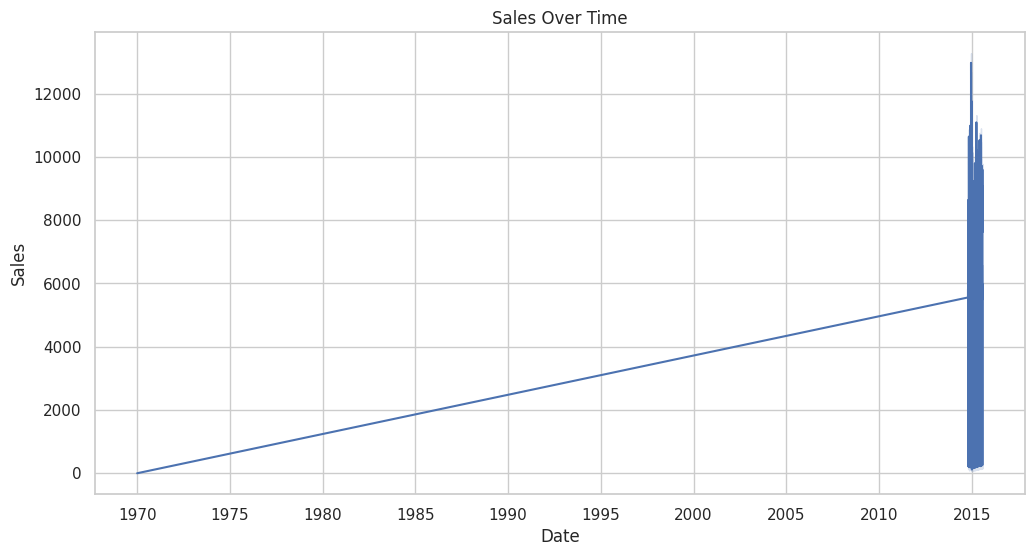

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x='Date', y='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Sales Distribution

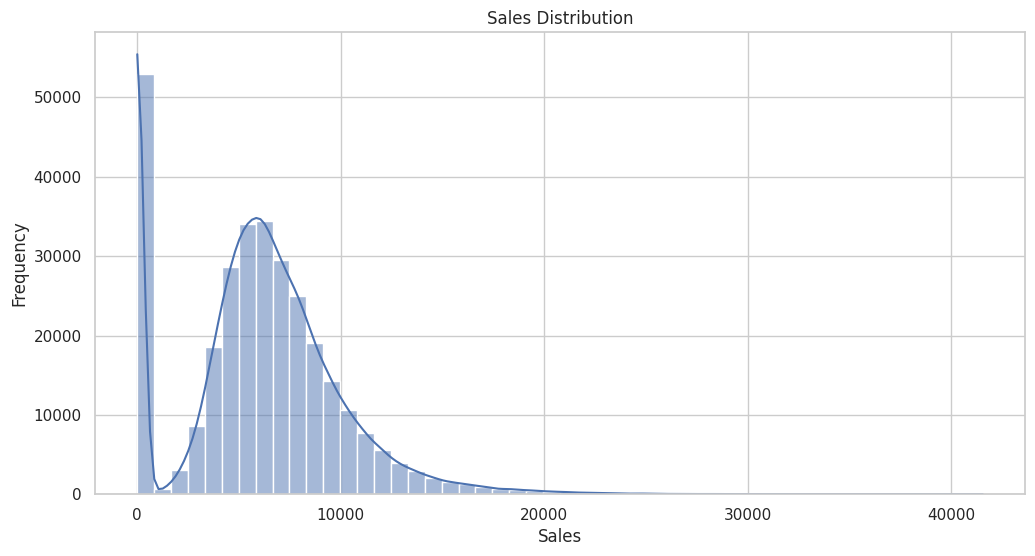

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Sales by Day of the Week

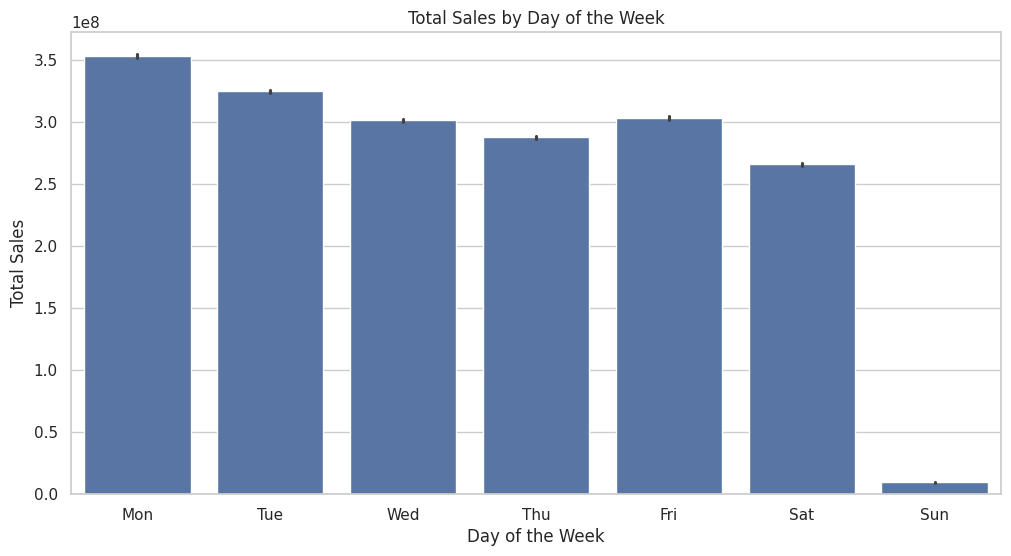

In [39]:
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek

plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='DayOfWeek', y='Sales', estimator=sum)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()